# multilinear regression

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')# for background of visualisatiom

In [11]:
df =pd.read_csv('Cars.csv')

In [12]:
df.head(2)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833


In [13]:
df.tail(2)

,HP,MPG,VOL,SP,WT
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [15]:
df.describe() # mean > median = positive skewness

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


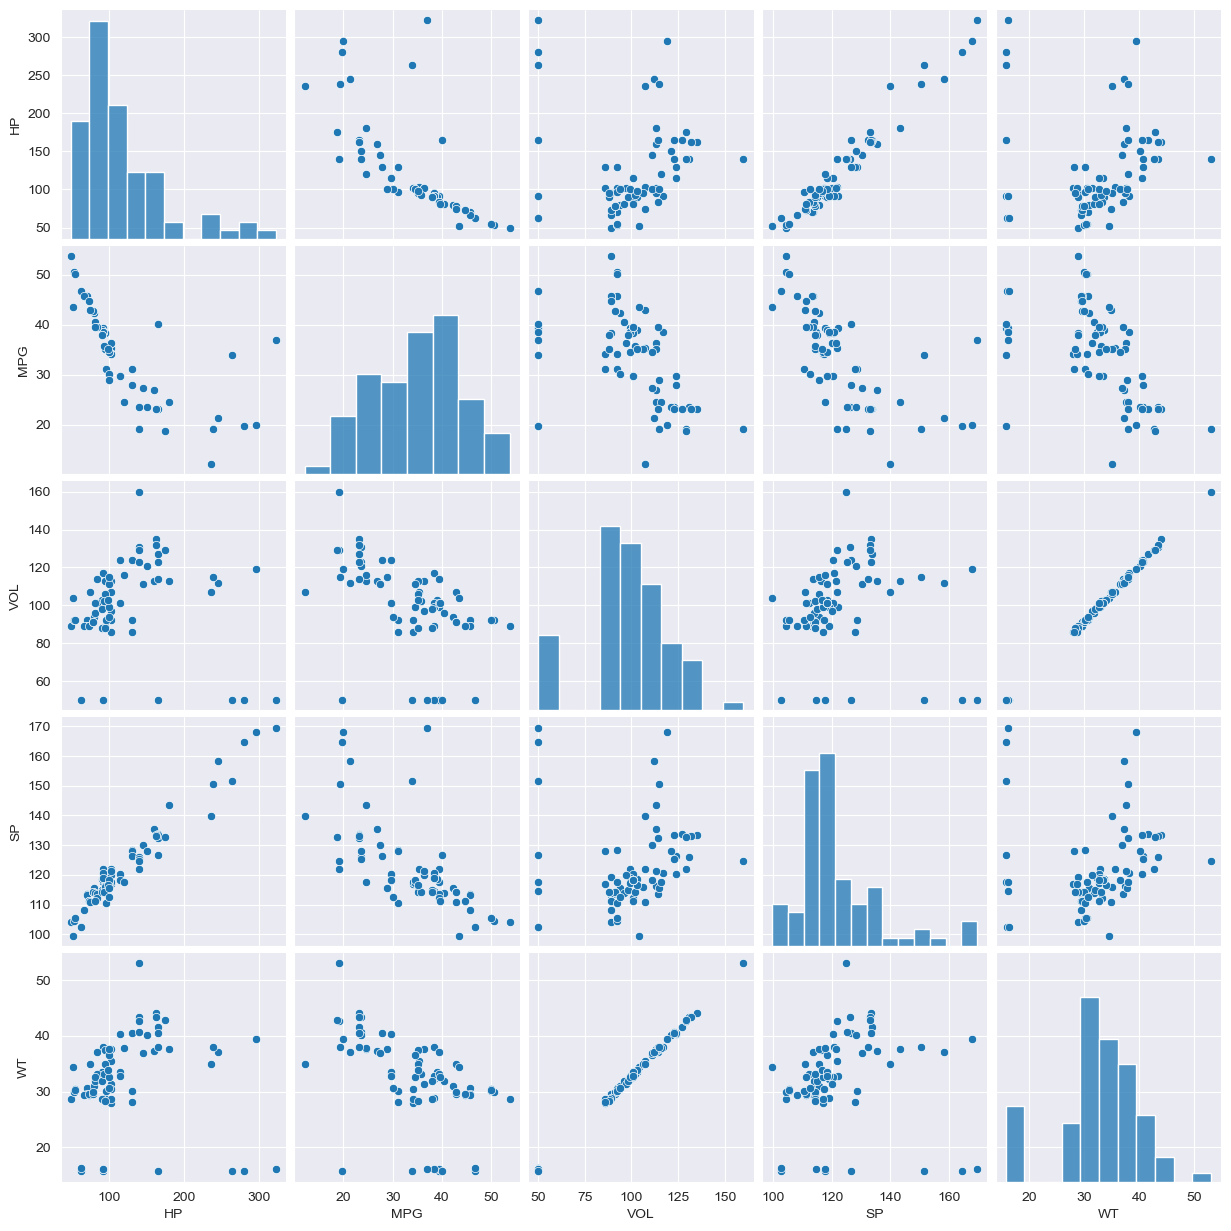

In [16]:
sns.pairplot(df) 

In [17]:
df.corr() # to check the correlation between the columns 

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

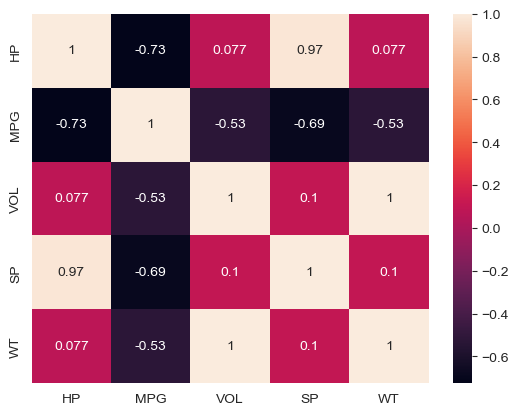

In [18]:
sns.heatmap(df.corr(),annot =True)

# model building 

In [19]:
models =smf.ols('MPG~HP+VOL+SP+WT',data =df).fit()

In [22]:
models.pvalues
# probability value for vol& WT >0.05 = we can accept the null hypothesis 
#hp and sp are imp but vol& wt is not import as a feture so we can reject them


Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

In [23]:
# build model using only 1 from weight & volume 

In [25]:
weight =smf.ols('MPG~HP+WT+SP',data =df).fit()
weight.pvalues

Intercept    5.053995e-02
HP           7.560276e-07
WT           1.914892e-13
SP           1.089096e-02
dtype: float64

In [26]:
vol =smf.ols('MPG~HP+VOL+SP',data =df).fit()
vol.pvalues

Intercept    4.194554e-02
HP           8.644870e-07
VOL          1.648229e-13
SP           1.207855e-02
dtype: float64

In [27]:
# volume and weight column are important but together they create multicollinearity problem 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [33]:
data =df.drop(columns =['MPG'])
# here we need to drop the target column we just need only future column

In [34]:
# VIF =1/1-R SQUARED FOR EACH VARIABLE ( R SQAURED IS A ACCURACY)


In [35]:
df.values # gives the values for all columns

array([[ 49.        ,  53.70068138,  89.        , 104.1853528 ,
         28.7620589 ],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.46683298],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.19359657],
       [ 70.        ,  45.69632238,  92.        , 113.4612635 ,
         30.63211391],
       [ 53.        ,  50.50423183,  92.        , 104.4612635 ,
         29.88914864],
       [ 70.        ,  45.69632238,  89.        , 113.1853528 ,
         29.59176832],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.30847957],
       [ 62.        ,  46.71655428,  50.        , 102.5985128 ,
         15.84775807],
       [ 62.        ,  46.71655428,  50.        , 102.5985128 ,
         16.35948352],
       [ 80.        ,  42.29907817,  94.        , 115.6452041 ,
         30.92015417],
       [ 73.        ,  44.65283424,  89.        , 111.1853528 ,
         29.36334142],
       [ 92.        ,  39.3540941 ,  50.   

In [36]:
vif =pd.DataFrame()
vif

""


In [37]:
vif['featured'] =data.columns

In [38]:
vif

,featured
0,HP
1,VOL
2,SP
3,WT


In [39]:
range(len(data.columns))

range(0, 4)

In [40]:
[variance_inflation_factor(data.values,i) for i in range(len(data.columns))] 

[11.19129601632287, 12708.789368875166, 50.54196822792541, 12172.827328054147]

In [41]:
vif['VIF'] =[variance_inflation_factor(data.values,i) for i in range(len(data.columns))] 

In [42]:
vif # i iterate as a column number

,featured,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


In [43]:
# volume and weight has high value and created the problem in collinearity

# subset selection

In [44]:
# we use r sqared and aic value 
# we choose the column which has highest r squared value and less aic value

In [45]:
weight =smf.ols('MPG~HP+WT+SP',data =df).fit()
weight.rsquared,weight.aic

(0.769482813998346, 476.29927501529767)

In [47]:
vol =smf.ols('MPG~HP+VOL+SP',data =df).fit()
vol.rsquared,weight.aic # volume column SHOWS more accuract then weight column

(0.770368341321302, 476.29927501529767)

# model validation technique

# 1.residual analysis

In [49]:
# as a accuracy check we find out that the volume column is more important than the the weight column

In [50]:
import statsmodels.api as sm #Q -Q plot function for error vs predicted

In [51]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [56]:
vol.fittedvalues # predicted values for the mpg column this is our target column
#error =53-43 =10 

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [58]:
vol.params

Intercept    29.923389
HP           -0.206705
VOL          -0.201651
SP            0.400659
dtype: float64

In [60]:
vol.resid # resid =error =actual - predicted value

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

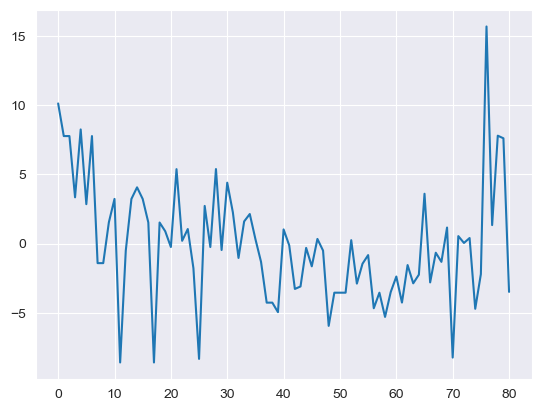

In [62]:
plt.plot(vol.resid)

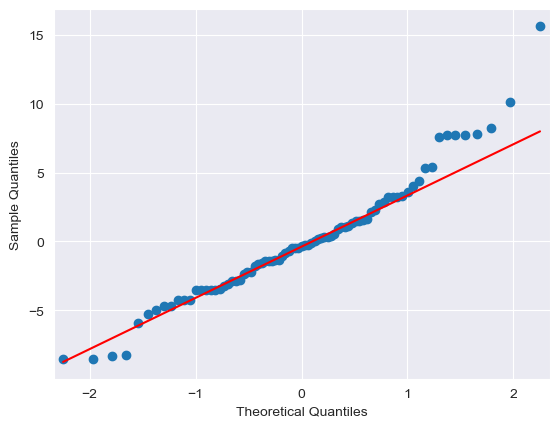

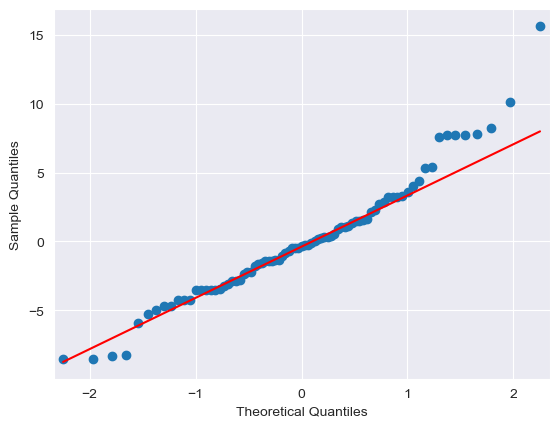

In [66]:
sm.qqplot(vol.resid,line ='q')
# data is not following normal distribution

In [69]:
np.argmax(vol.resid),np.max(vol.resid)
# arg max find the max value and return its index ,max will return the max error value
#( index number, high error value)

(76, 15.66685740285206)

# 2.residual plot of homoscedasticity

In [70]:
vol.params

Intercept    29.923389
HP           -0.206705
VOL          -0.201651
SP            0.400659
dtype: float64

In [72]:
vol.fittedvalues

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [74]:
vol.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

In [75]:
# to draw a  scatter plot between the our y hat value and the error y hat means our predicted value

Text(0, 0.5, 'error')

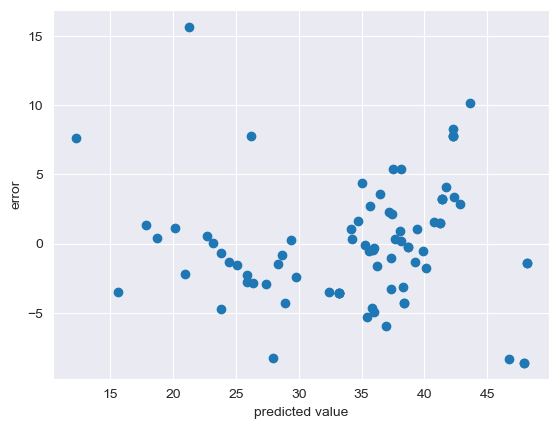

In [80]:
plt.scatter(vol.fittedvalues,vol.resid)
plt.xlabel('predicted value')
plt.ylabel('error')

In [82]:
# zero error has high values in above graph

# 3.residual vs regressor

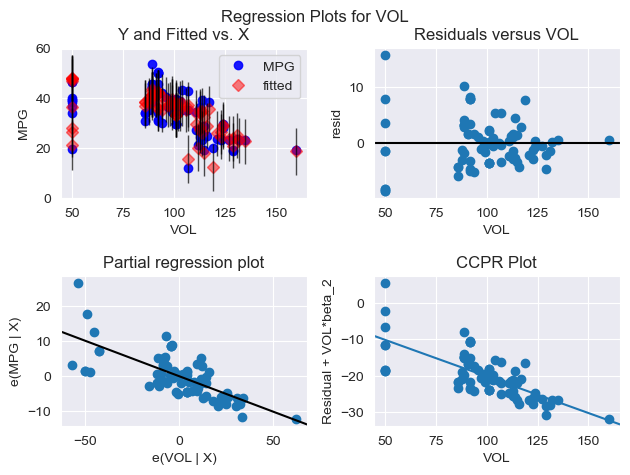

In [86]:
sm.graphics.plot_regress_exog(vol,'VOL');

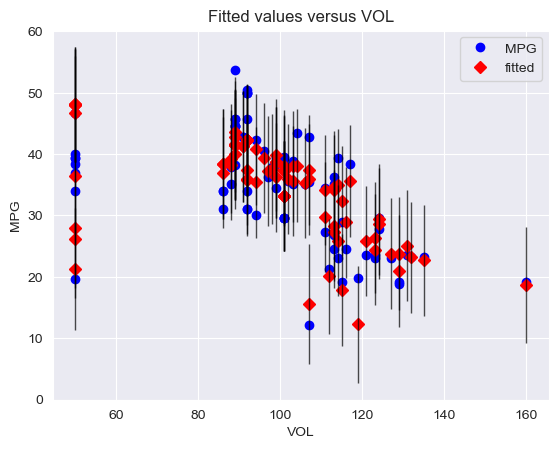

In [88]:
sm.graphics.plot_fit(vol,'VOL');

In [89]:
# do ]this for each column

# model deletion technique

In [90]:
vol


In [93]:
#  to calculate the cooks distance
inf =vol.get_influence() # this get_influence( ) will do the all calculations



In [94]:
# calcute the cook distance 
c,p =inf.cooks_distance # return the 81 cooks distance and 81 cooks values ?

In [97]:
c # c is for the cooks distance

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

Text(0, 0.5, 'cooks distance')

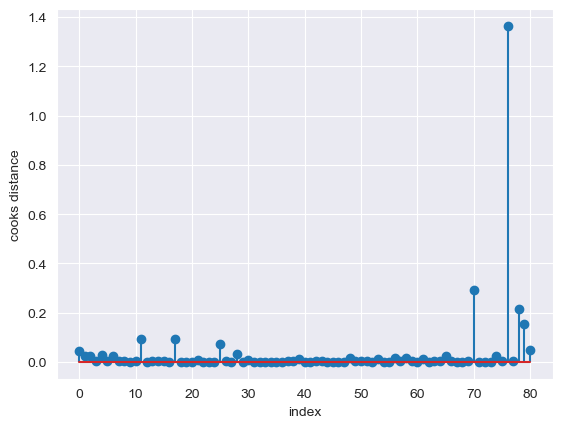

In [98]:
plt.stem(c)
plt.xlabel('index')
plt.ylabel('cooks distance')

In [100]:
np.argmax(c),np.max(c) # row 76 has highest cook distance

(76, 1.36417438691032)

In [101]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [102]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [103]:
from statsmodels.graphics.regressionplots import influence_plot

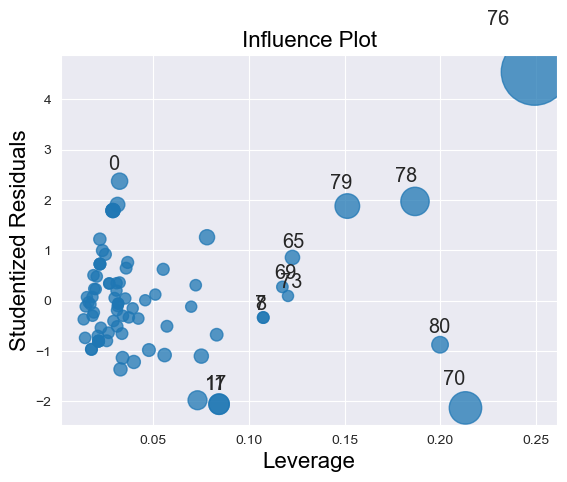

In [104]:
influence_plot(vol);

In [105]:
# calculate the cutoff 
k =len(df.columns)
n =len(df)
leverage =3 *(k+1)/n
leverage

0.2222222222222222

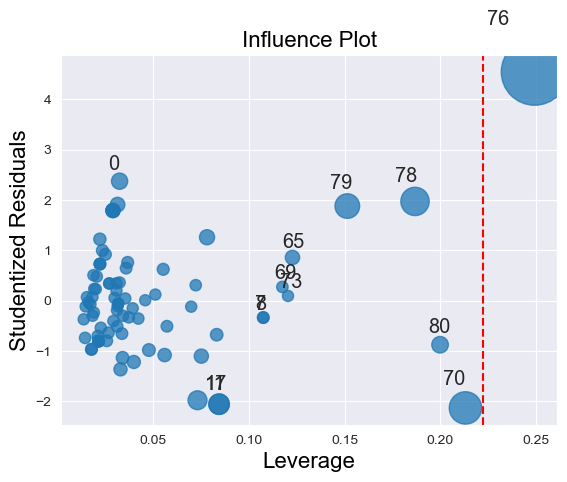

In [109]:
influence_plot(vol)
plt.axvline(leverage,linestyle ='--',color ='red')
#axvline  = axis verticle line this is a cutoff line 
# on the right hand of the  cutoff line there is a outliers

In [110]:
df.drop(index =76,inplace =True)

In [111]:
df.shape

(80, 5)

In [114]:
df.reset_index(inplace =True) # this will make the proper index
# means when we remove the 76th record the sequence is 75,77,78
# we need to rearrange the index like 75,76,78 

In [115]:
df

,level_0,index,HP,MPG,VOL,SP,WT
0,0,0,49,53.700681,89,104.185353,28.762059
1,1,1,55,50.013401,92,105.461264,30.466833
2,2,2,55,50.013401,92,105.461264,30.193597
3,3,3,70,45.696322,92,113.461264,30.632114
4,4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...,...
75,75,75,175,18.762837,129,132.864163,42.778219
76,76,77,238,19.197888,115,150.576579,37.923113
77,77,78,263,34.000000,50,151.598513,15.769625
78,78,79,295,19.833733,119,167.944460,39.423099


In [122]:
[df.drop(columns =['level_0'],inplace =True)

In [123]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [124]:
final_model =smf.ols('MPG~HP+VOL+SP',data =df).fit()

In [126]:
final_model.rsquared # this model give us 81% of accuracy

0.8192122305013385

In [127]:
# testing for new inputs

In [128]:
test =pd.DataFrame({
    'HP':[56,53.62,95],
     'VOL':[92.6,85.63,75],
    'SP':[110,112,150]
    
})

In [129]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [131]:
final_model.params

Intercept    27.755465
HP           -0.226762
VOL          -0.172856
SP            0.412363
dtype: float64

In [132]:
final_model.predict(test)

0    44.410251
1    46.979473
2    55.103295
dtype: float64